In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("sem1-19_20.csv")
data

,matric,milestone/10,persembahan/5,tot_CPS3/15,akhir/40,milestone/5,penilaian/15,persembahan/5.1,tot_CPS7/65,milestone/5.1,projek/15,tot_CPS9/20,totMarks,grade,Fr_File,Fr_Forum,Fr_Overview report,Fr_Page,Fr_System,Fr_URL,Fr_User report,totFreqParticipation
0,188640,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,F,0,0,0,0,0,0,0,0
1,191474,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,F,0,0,0,0,0,0,0,0
2,191854,6.9,4.3,11.2,15.5,4.0,8.63,4.3,32.43,4.0,15.0,19.0,62.63,B-,0,13,0,0,14,0,0,27
3,192018,4.0,2.1,6.1,11.5,3.5,5.25,2.1,22.35,3.5,7.5,11.0,39.45,F,3,6,0,2,39,2,0,52
4,192526,6.6,4.3,10.9,14.5,4.0,8.63,4.3,31.43,4.0,15.0,19.0,61.33,B-,0,35,0,3,15,0,0,53
5,192700,7.5,4.9,12.4,35.0,5.0,8.63,4.9,53.53,5.0,15.0,20.0,85.93,A,12,56,0,3,56,3,0,130
6,192701,4.9,3.1,8.0,12.0,4.0,2.63,3.1,21.73,4.0,10.0,14.0,43.73,D+,1,4,0,1,9,0,0,15
7,192702,7.3,4.8,12.1,21.0,5.0,8.25,4.8,39.05,5.0,15.0,20.0,71.15,B+,8,50,0,11,53,5,0,127
8,192704,10.0,2.1,12.1,21.5,3.5,7.50,2.1,34.60,3.5,7.5,11.0,57.70,C+,6,38,0,5,16,3,0,68
9,192733,6.2,4.9,11.1,22.5,5.0,9.75,4.9,42.15,5.0,15.0,20.0,73.25,B+,6,67,0,9,54,2,0,138


Now, we only want to extract numeric data only for correlation analysis. select_dtypes is use to select specific data type, object type is use to select string type data. Therefore, exclude is used to eliminate the object type.

In [9]:
numeric_data = data.select_dtypes(exclude=['object'])
numeric_data

,milestone/10,persembahan/5,tot_CPS3/15,akhir/40,milestone/5,penilaian/15,persembahan/5.1,tot_CPS7/65,milestone/5.1,projek/15,tot_CPS9/20,totMarks,Fr_File,Fr_Forum,Fr_Overview report,Fr_Page,Fr_System,Fr_URL,Fr_User report,totFreqParticipation
0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0,0,0,0,0,0,0,0
2,6.9,4.3,11.2,15.5,4.0,8.63,4.3,32.43,4.0,15.0,19.0,62.63,0,13,0,0,14,0,0,27
3,4.0,2.1,6.1,11.5,3.5,5.25,2.1,22.35,3.5,7.5,11.0,39.45,3,6,0,2,39,2,0,52
4,6.6,4.3,10.9,14.5,4.0,8.63,4.3,31.43,4.0,15.0,19.0,61.33,0,35,0,3,15,0,0,53
5,7.5,4.9,12.4,35.0,5.0,8.63,4.9,53.53,5.0,15.0,20.0,85.93,12,56,0,3,56,3,0,130
6,4.9,3.1,8.0,12.0,4.0,2.63,3.1,21.73,4.0,10.0,14.0,43.73,1,4,0,1,9,0,0,15
7,7.3,4.8,12.1,21.0,5.0,8.25,4.8,39.05,5.0,15.0,20.0,71.15,8,50,0,11,53,5,0,127
8,10.0,2.1,12.1,21.5,3.5,7.50,2.1,34.60,3.5,7.5,11.0,57.70,6,38,0,5,16,3,0,68
9,6.2,4.9,11.1,22.5,5.0,9.75,4.9,42.15,5.0,15.0,20.0,73.25,6,67,0,9,54,2,0,138


Next, we need to inspect any column with missing data values.

In [10]:
columns_with_missing = [col for col in numeric_data.columns if numeric_data[col].isnull().any()]
len(columns_with_missing)

0

In [11]:
number_NaN = numeric_data.isna().sum()
number_NaN

milestone/10            0
 persembahan/5          0
 tot_CPS3/15            0
akhir/40                0
 milestone/5            0
 penilaian/15           0
 persembahan/5.1        0
 tot_CPS7/65            0
 milestone/5.1          0
 projek/15              0
 tot_CPS9/20            0
totMarks                0
Fr_File                 0
Fr_Forum                0
Fr_Overview report      0
Fr_Page                 0
Fr_System               0
Fr_URL                  0
Fr_User report          0
totFreqParticipation    0
dtype: int64

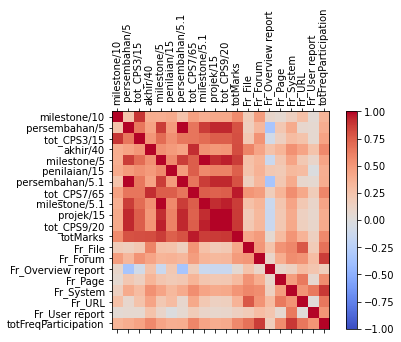

In [12]:
corr = numeric_data.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,len(numeric_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)

ax.set_yticks(ticks)
ax.set_xticklabels(numeric_data.columns)
ax.set_yticklabels(numeric_data.columns)

plt.show()

In [13]:
corr

,milestone/10,persembahan/5,tot_CPS3/15,akhir/40,milestone/5,penilaian/15,persembahan/5.1,tot_CPS7/65,milestone/5.1,projek/15,tot_CPS9/20,totMarks,Fr_File,Fr_Forum,Fr_Overview report,Fr_Page,Fr_System,Fr_URL,Fr_User report,totFreqParticipation
milestone/10,1.000000,0.254228,0.897176,0.395543,0.388196,0.409721,0.254228,0.458585,0.388196,0.419854,0.418482,0.566610,0.184776,0.482619,0.098269,0.063868,0.151463,0.279309,0.046883,0.347132
persembahan/5,0.254228,1.000000,0.655249,0.446187,0.872755,0.488024,1.000000,0.663220,0.872755,0.934661,0.933655,0.798081,0.160187,0.330955,-0.343205,0.223278,0.403447,0.084989,0.069819,0.398270
tot_CPS3/15,0.897176,0.655249,1.000000,0.512713,0.701778,0.542893,0.655249,0.661067,0.701778,0.754777,0.753246,0.807032,0.217478,0.528102,-0.079979,0.151852,0.302550,0.256975,0.068504,0.453018
akhir/40,0.395543,0.446187,0.512713,1.000000,0.544596,0.497274,0.446187,0.920946,0.544596,0.506589,0.523144,0.819787,0.597849,0.444491,0.261447,0.350393,0.536924,0.441986,0.257252,0.575995
milestone/5,0.388196,0.872755,0.701778,0.544596,1.000000,0.577617,0.872755,0.752319,1.000000,0.919842,0.952564,0.867913,0.266328,0.346696,-0.127367,0.240688,0.440533,0.217108,0.102299,0.437781
penilaian/15,0.409721,0.488024,0.542893,0.497274,0.577617,1.000000,0.488024,0.757703,0.577617,0.606912,0.608865,0.746250,0.255717,0.360087,0.211686,0.200416,0.326151,0.299949,-0.008266,0.384052
persembahan/5.1,0.254228,1.000000,0.655249,0.446187,0.872755,0.488024,1.000000,0.663220,0.872755,0.934661,0.933655,0.798081,0.160187,0.330955,-0.343205,0.223278,0.403447,0.084989,0.069819,0.398270
tot_CPS7/65,0.458585,0.663220,0.661067,0.920946,0.752319,0.757703,0.663220,1.000000,0.752319,0.736004,0.750759,0.960167,0.517727,0.480551,0.178250,0.344700,0.549611,0.414923,0.184982,0.592030
milestone/5.1,0.388196,0.872755,0.701778,0.544596,1.000000,0.577617,0.872755,0.752319,1.000000,0.919842,0.952564,0.867913,0.266328,0.346696,-0.127367,0.240688,0.440533,0.217108,0.102299,0.437781
projek/15,0.419854,0.934661,0.754777,0.506589,0.919842,0.606912,0.934661,0.736004,0.919842,1.000000,0.995597,0.879144,0.192452,0.323636,-0.136995,0.215159,0.401516,0.144037,0.093028,0.398032
